# Make an alluvial plot for the pilot fungal genomes

In [2]:
library(readr)
library(dplyr, warn.conflicts = F)
library(janitor, warn.conflicts = F)
library(ggplot2)
library(ggforce)

In [3]:
setwd("..")

In [4]:
# adjust plot size rendered inline
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

## Plot pilot input fungal data

In [15]:
metadata <- read_tsv("inputs/candidate_fungi_for_bio_test_data_set.tsv", show_col_types = F) %>%
  filter(source == "genome")

In [40]:
sankey_df <- metadata %>%
  # put leading spaces to change order of final plot
  mutate(subphylum = ifelse(subphylum == "Pezizomycotina", " Pezizomycotina", subphylum),
         class = ifelse(class == "Sordariomycetes", " Sordariomycetes", class),
         order = ifelse(order == "Hypocreales", " Hypocreales", order),
         family = ifelse(family == "Ophiocordycipitaceae", "  Ophiocordycipitaceae", family),
         family = ifelse(family == "Clavicipitaceae", "  Clavicipitaceae", family),
         family = ifelse(family == "Cordycipitaceae", "  Cordycipitaceae", family),
         family = ifelse(family == "Pleurotaceae", "  Pleurotaceae", family),
         family = ifelse(family == "Strophariaceae", "  Strophariaceae", family),
         family = ifelse(family == "Amanitaceae", " Amanitaceae", family),
         family = ifelse(family == "Lyophyllaceae", " Lyophyllaceae", family),
         family = ifelse(family == "Polyporaceae", " Polyporaceae", family),
         genus = ifelse(genus == "Epichloe", "      Epichloe", genus),
         genus = ifelse(genus == "Cordyceps", "     Cordyceps", genus),
         genus = ifelse(genus == "Claviceps", "     Claviceps", genus),
         genus = ifelse(genus == "Ophiocordyceps", "     Ophiocordyceps", genus),
         genus = ifelse(genus == "Pleurotus", "    Pleurotus", genus),
         genus = ifelse(genus == "Agrocybe", "   Agrocybe", genus),
         genus = ifelse(genus == "Psilocybe", "   Psilocybe", genus),
         genus = ifelse(genus == "Amanita", "  Amanita", genus),
         genus = ifelse(genus == "Trametes", "  Trametes", genus),
         genus = ifelse(genus == "Termitomyces", "  Termitomyces", genus),
         genus = ifelse(genus == "Ganoderma", " Ganoderma", genus)) %>%
  select(organism_name, kingdom, phylum, subphylum, class, order, family, genus) %>%
  group_by(kingdom, phylum, subphylum, class, order, family, genus) %>%
  tally()

In [41]:
# format for ggforce parallel sets
data <- ggforce::gather_set_data(sankey_df, 1:7)

# create a palette that recycles colors so each taxonomic label will be colorful
palette <- c( "#8DA0CB",  "#A6D854", "#FFD92F", "#E78AC3", "#E5C494", "#66C2A5", "#FC8D62", "#B3B3B3")

# otherwise ramp up from the user-defined palette
palette <- grDevices::colorRampPalette(palette)(length(unique(data$y)))

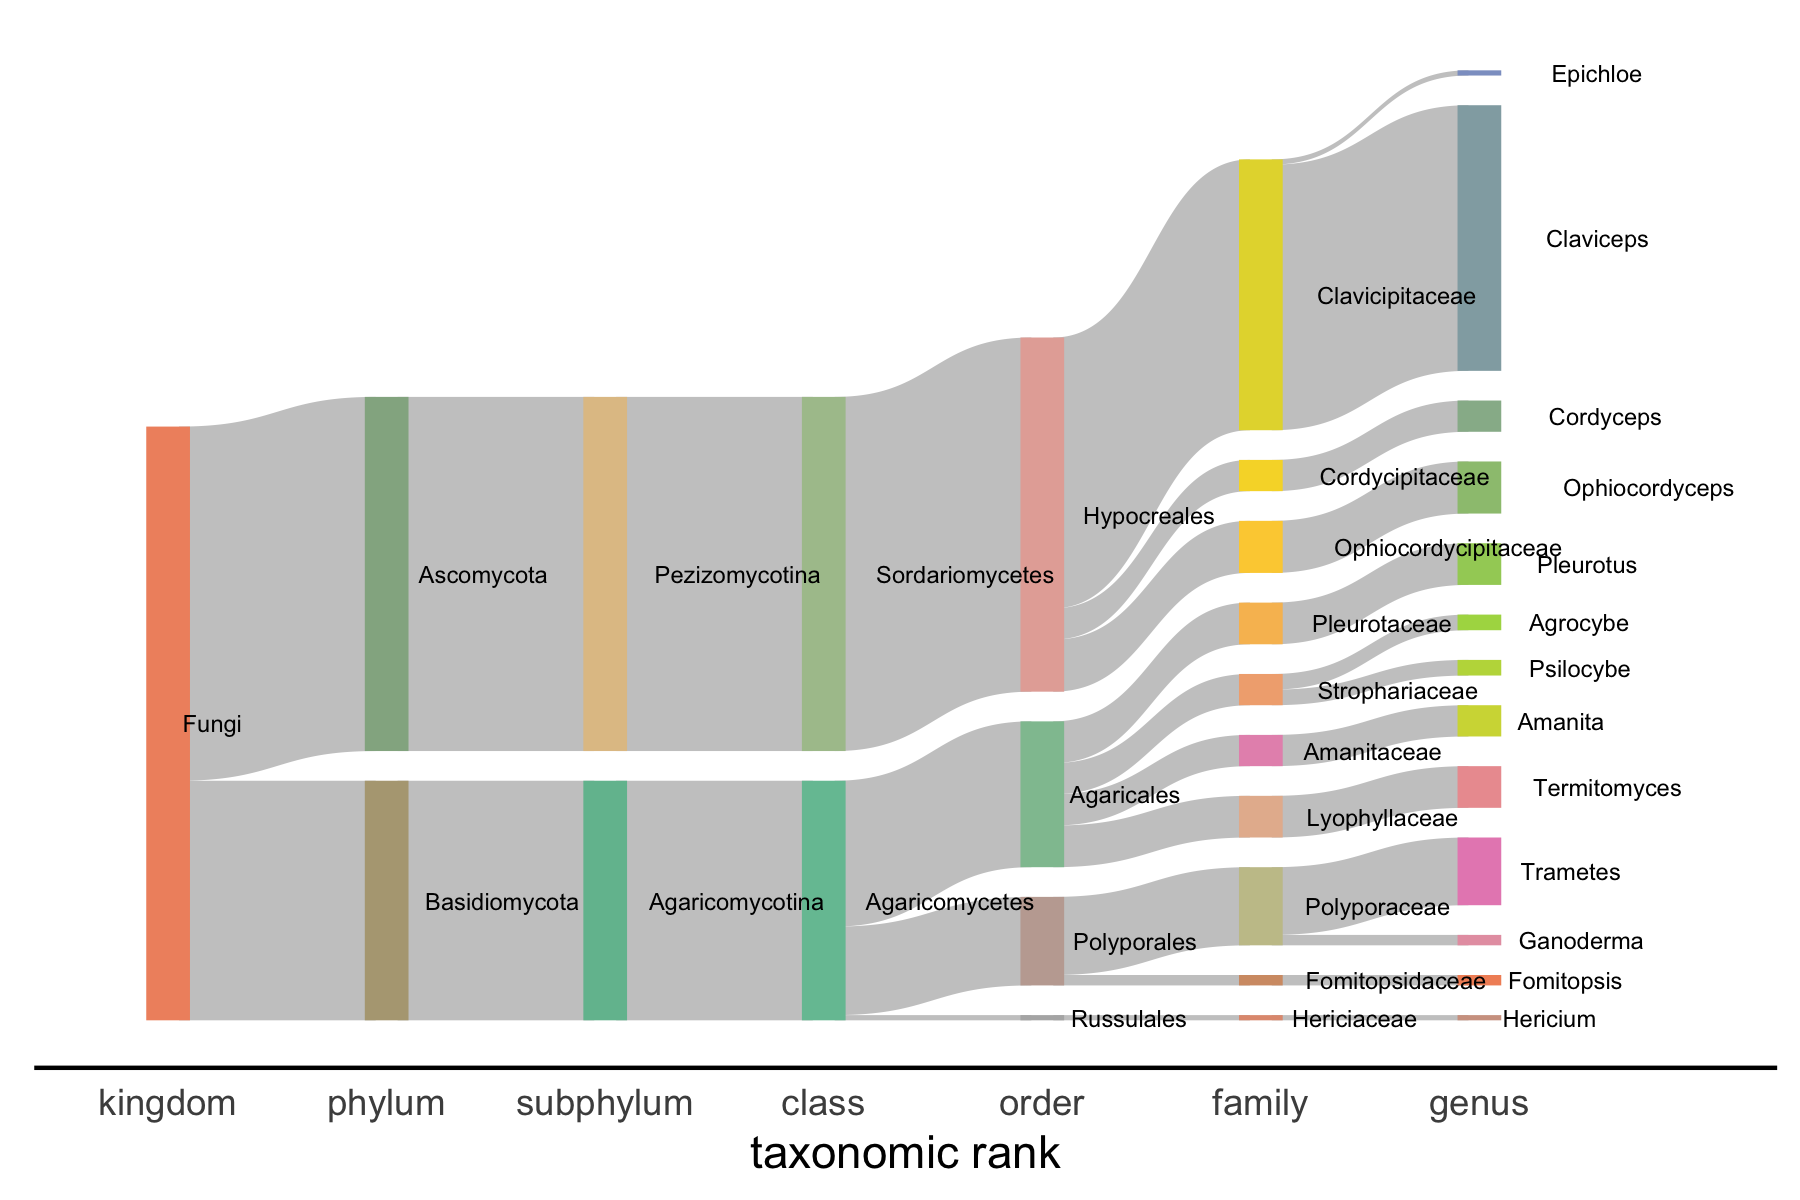

In [42]:
ggplot(data, aes(x = x, id = id, split = y, value = n)) +
  geom_parallel_sets(alpha = 0.3, axis.width = 0.1) +
  geom_parallel_sets_axes(axis.width = 0.2, aes(fill = y)) +
  theme_classic() +
  theme(axis.line.y = element_blank(),
                 axis.text.y = element_blank(),
                 axis.ticks.y = element_blank(),
                 axis.ticks.x = element_blank(),
                 legend.position = "None") +
  labs(x = "taxonomic rank") +
  # buffer the last axis so full names have space to print to viz
  scale_x_continuous(labels = c("kingdom", "phylum", "subphylum", "class", "order", "family", "genus"),
                              breaks = 1:7,
                              limits = c(.75, 8)) +
  scale_fill_manual(values = palette) +
  geom_parallel_sets_labels(colour = 'black', angle = 360, size = 2, hjust = -0.25)

In [43]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggforce_0.4.1 ggplot2_3.4.0 janitor_2.2.0 dplyr_1.0.10  readr_2.1.3  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9       pillar_1.8.1     compiler_4.2.1   base64enc_0.1-3 
 [5] tools_4.2.1      bit_4.0.5        digest_0.6.31    uuid_1.1-0      
 [9] gtable_0.3.1     jsonlite_1.8.4   lubridate_1.8.0  evaluate_0.20   
[13] lifecycle_1.0.3  tibble_3.1.8     pkgconfig_2.0.3  rlang_1.0.6     
[17] IRdisplay_1.1    cli_3.6.0        DBI_1.1.3        parallel_4.2.1  
[21] IRkernel_1.3     fastmap_1.1.0    withr_2.5.0      repr_1.1.4      
[25] stringr_